In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Student_performance_data _.csv')
#set studentID column as an index column
df.set_index('StudentID', inplace=True)
df.sample(40)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1881,15,1,2,2,6.726255,27,0,1,0,0,0,0,0.094652,4.0
3048,17,1,0,0,5.327553,26,1,1,0,1,0,0,0.655012,4.0
2892,16,1,0,3,10.100561,14,1,1,0,0,0,0,1.914602,4.0
1431,15,0,1,1,3.758072,12,0,3,1,1,0,0,2.017218,3.0
2448,18,1,1,3,16.968355,1,1,0,0,1,0,0,3.408490,1.0
3374,18,0,3,2,19.088954,25,0,2,0,0,0,0,0.825020,1.0
2338,16,0,1,1,13.760610,26,0,2,1,0,0,0,0.673526,4.0
2453,18,1,0,2,5.669223,24,1,1,0,0,1,0,0.754036,4.0
1802,16,0,0,0,15.149381,16,1,2,1,0,0,0,1.955792,4.0


#Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 1001 to 3392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 280.3 KB


In [4]:
del df['GradeClass']
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
StudentID,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [5]:
#Missing values
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0


In [6]:
#duplicates
df.duplicated().sum()

0

In [7]:
#Exploring the table to see if there are some outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


#Exploratory Data Analysis (EDA)
* Univariant Visualisation

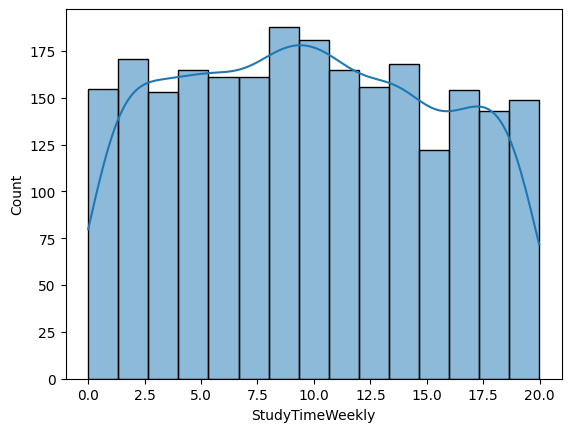

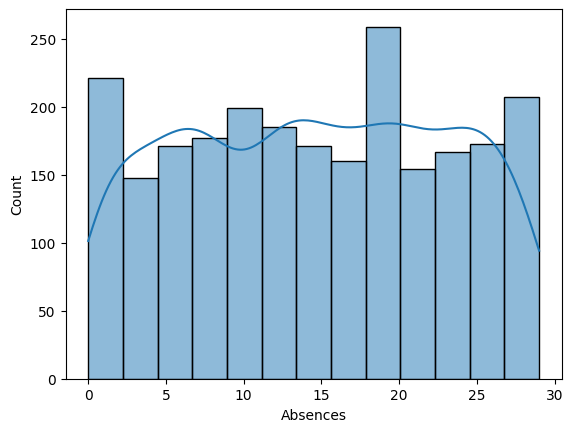

In [8]:
# Visualize distributions
sns.histplot(df['StudyTimeWeekly'], kde=True)
plt.show()

sns.histplot(df['Absences'], kde=True)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['StudyTimeWeekly', 'Absences']])

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


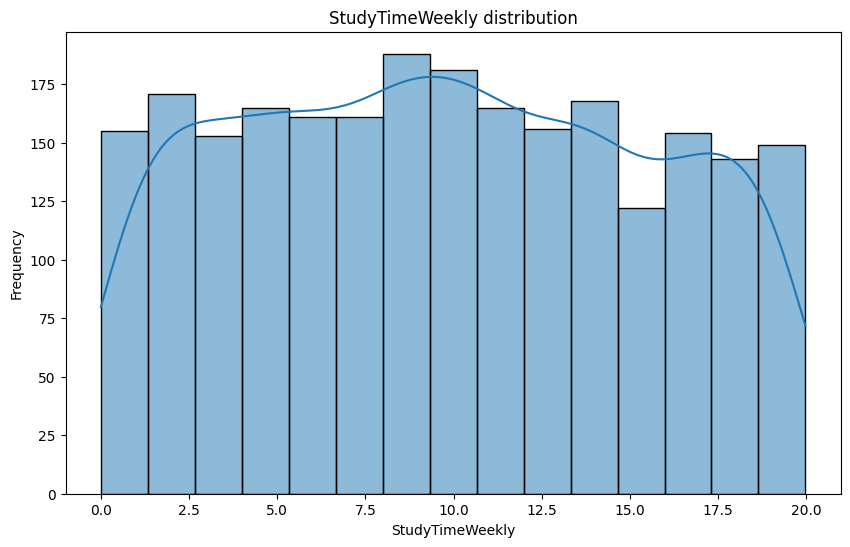

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['StudyTimeWeekly'], bins=15, kde=True)
plt.title ("StudyTimeWeekly distribution")
plt.xlabel('StudyTimeWeekly')
plt.ylabel('Frequency')
plt.show()

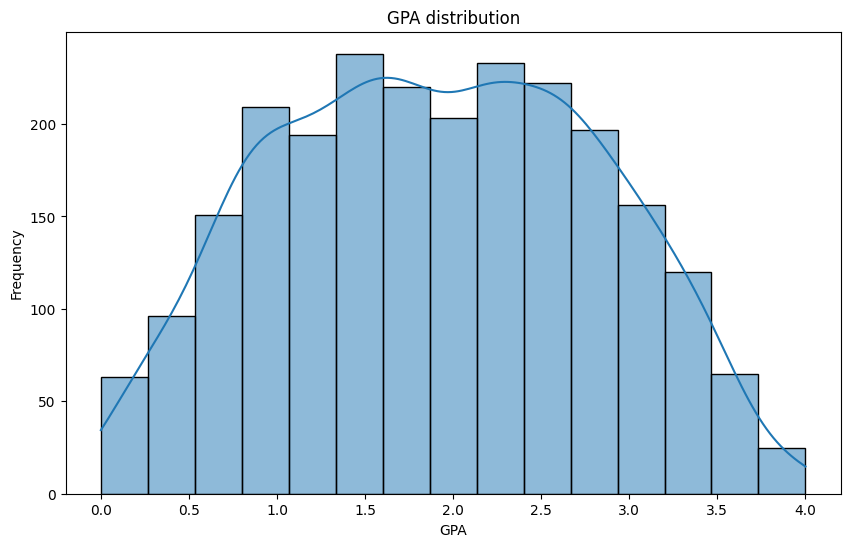

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['GPA'], bins=15, kde=True)
plt.title ("GPA distribution")
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

* Multivariant

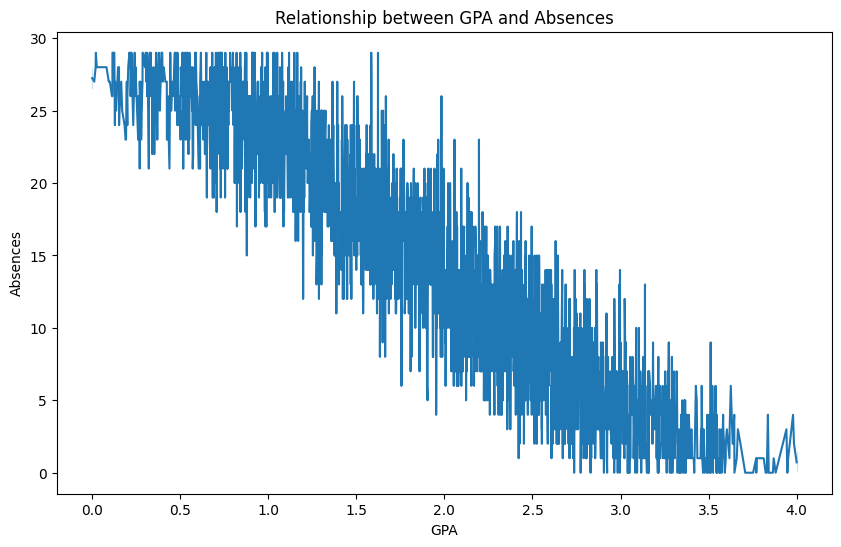

In [13]:
#display a relationship between studyTimeWeekly and Absences
plt.figure(figsize=(10,6))
sns.lineplot(x='GPA', y='Absences', data=df)
plt.title('Relationship between GPA and Absences')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.show()

This shows that the more one is absent the lower the GPA and vice versa

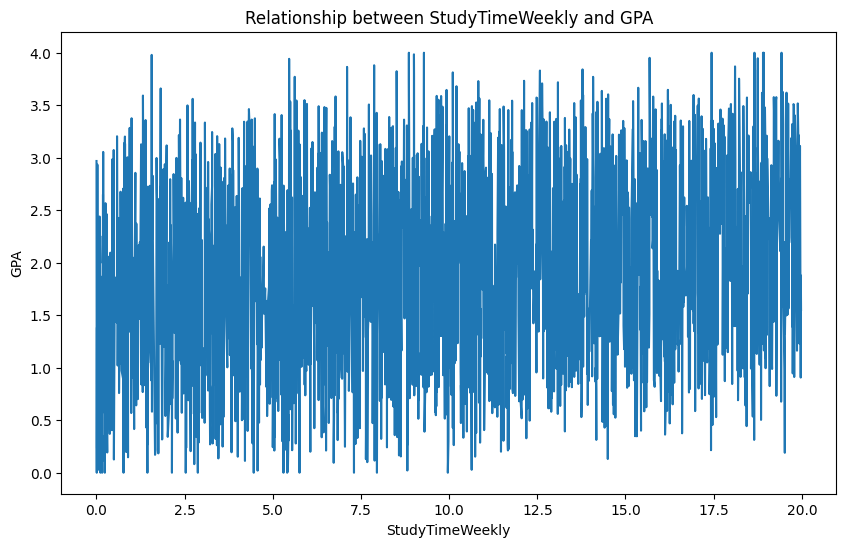

In [14]:
#display a relationship between studyTimeWeekly and GPA
plt.figure(figsize=(10,6))
sns.lineplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title('Relationship between StudyTimeWeekly and GPA')
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GPA')
plt.show()

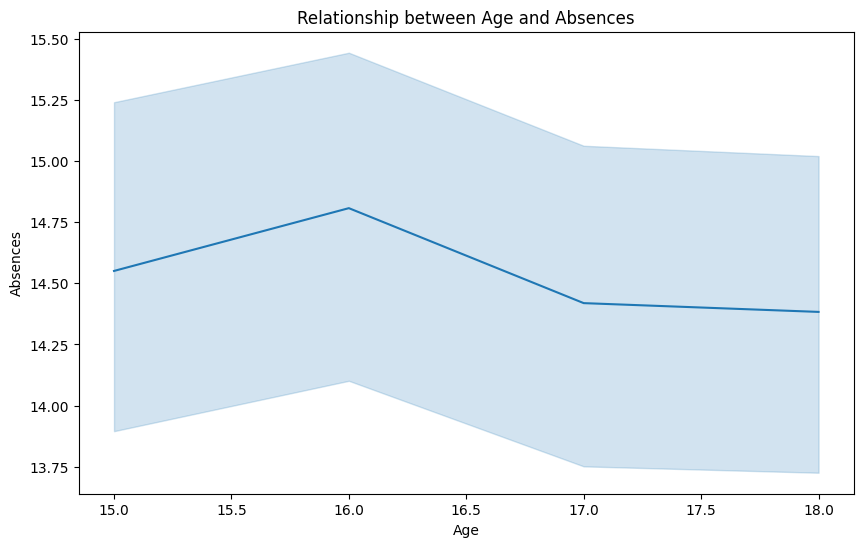

In [15]:
#display a relationship between Age and Absences
plt.figure(figsize=(10,6))
sns.lineplot(x='Age', y='Absences', data=df)
plt.title('Relationship between Age and Absences')
plt.xlabel('Age')
plt.ylabel('Absences')
plt.show()

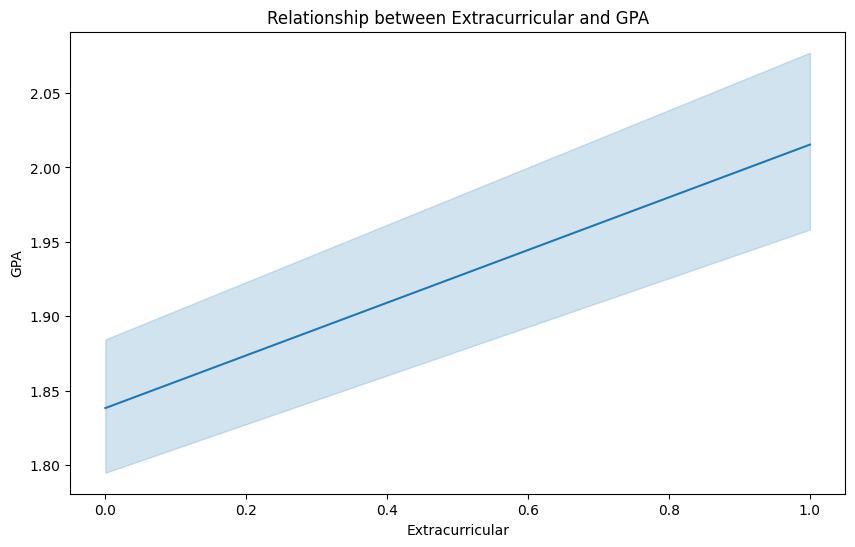

In [16]:
#display a relationship between Extracurricular and GPA
plt.figure(figsize=(10,6))
sns.lineplot(x='Extracurricular', y='GPA', data=df)
plt.title('Relationship between Extracurricular and GPA')
plt.xlabel('Extracurricular')
plt.ylabel('GPA')
plt.show()

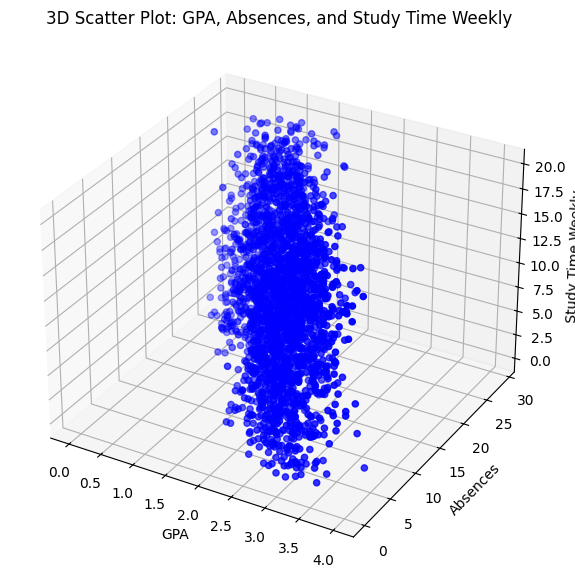

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(df['GPA'], df['Absences'], df['StudyTimeWeekly'], c='blue', marker='o')

# Labels
ax.set_xlabel('GPA')
ax.set_ylabel('Absences')
ax.set_zlabel('Study Time Weekly')

plt.title("3D Scatter Plot: GPA, Absences, and Study Time Weekly")
plt.show()

Insights from the data
* Several students have low GPAs, namely below 3.00.
* The education level of students’ parents does not show a significant influence on the GPA obtained by students.
* The level of parental support greatly influences students’ GPA. The higher the attention and support of parents, the higher the student’s GPA.
* A student’s attendance level has a significant influence on their GPA.
* The higher the student’s absenteeism rate, the lower the GPA obtained.
Student study hours show a positive correlation with GPA. The more time students spend studying, the higher the GPA they earn.
* Even though student study hours are high, if student attendance is also high, the GPA obtained will be low.
* Students who are involved in additional activities such as extracurriculars (including music and sports), extra classes, and volunteer activities tend to have high GPAs.

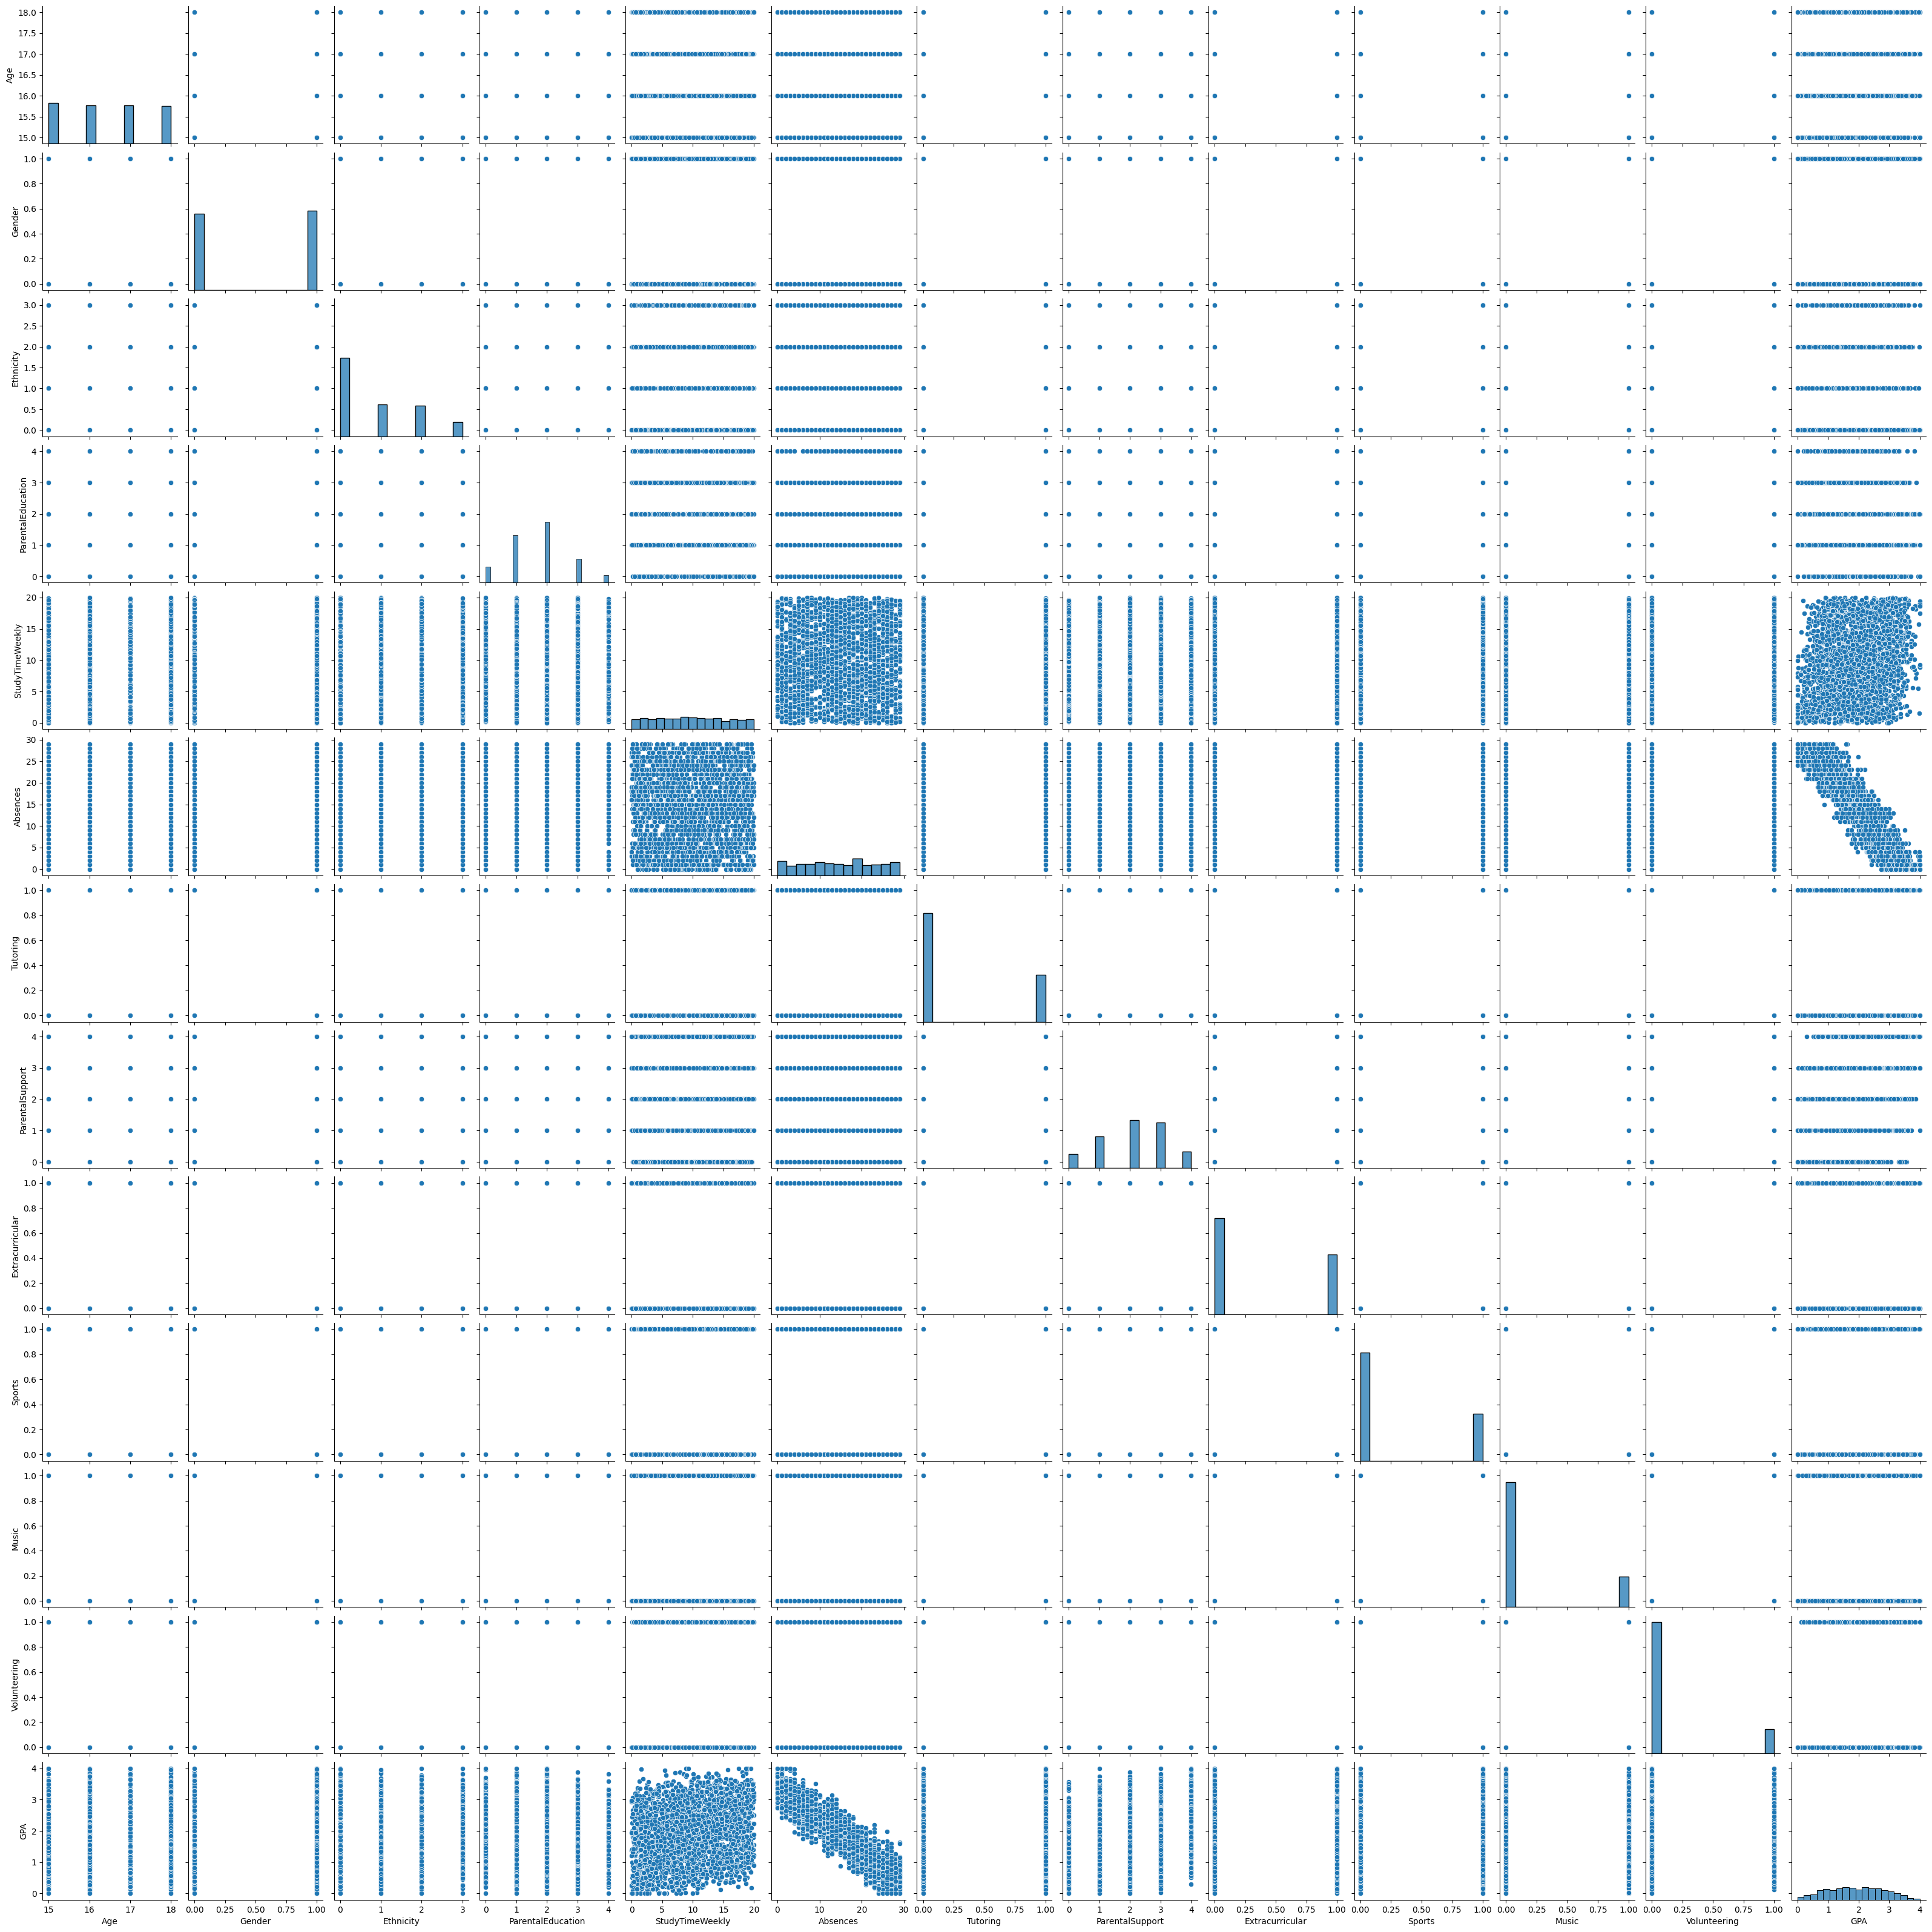

In [18]:
from seaborn import pairplot

# Create a pairplot with all numerical variables in the data
pairplot(df)

# ML Modelling

In [19]:
#split the data using the train test split
from sklearn.model_selection import train_test_split
X = df.drop('GPA', axis=1)
y = df['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([1.47962878, 2.91427518, 1.77206275, 3.52163738, 0.25163087,
       2.70980007, 1.62421197, 2.31993963, 2.1334432 , 1.02044599,
       2.48492537, 0.61962134, 3.10601355, 2.71831771, 2.86215313,
       0.32449476, 1.07378891, 1.53758735, 2.0041632 , 2.68807013,
       2.28873431, 1.62385037, 1.71808637, 3.31531743, 1.80377182,
       0.58020221, 1.70265227, 2.49789351, 2.04923295, 1.81493781,
       1.93411954, 0.72686931, 3.02742157, 3.17653416, 1.46518792,
       1.91071581, 3.17533139, 2.8683181 , 3.25941019, 0.75650343,
       2.70905677, 3.43846388, 1.17728675, 2.25694945, 0.92662847,
       2.62595992, 3.00424795, 1.10397511, 2.77347315, 1.59601894,
       3.11638134, 3.08423642, 1.57752653, 1.18248033, 1.78439566,
       3.47239789, 2.40503909, 3.3384737 , 1.04182043, 2.10391528,
       1.73897898, 1.8659067 , 2.33692928, 1.50166865, 1.10595768,
       2.30746845, 3.44457148, 2.62505459, 1.10247488, 3.49204263,
       3.50010521, 0.92098324, 3.00795941, 2.71815001, 0.84465

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 0.03866144149454255
R²: 0.9532471681022928


In [23]:
# Calculate residuals
residuals = y - model.predict(X)

#Residuals in our linear regression model.
 Residuals represent the difference between the actual values and the predicted values of the model.

 Residual Plot: will check for randomness in residuals. Any visible pattern suggests the model might not capture all relationships in the data. this will help us detect issues like heteroscedasticity (where residuals' variance increases with predicted values) or non-linearity.

Histogram of Residuals: will help check the normality assumption of residuals. If residuals are normally distributed, the histogram should resemble a bell curve. Skewed or heavy-tailed distributions might suggest model issues. By plotting residuals, we shall check important assumptions in regression and identify potential problems in the model

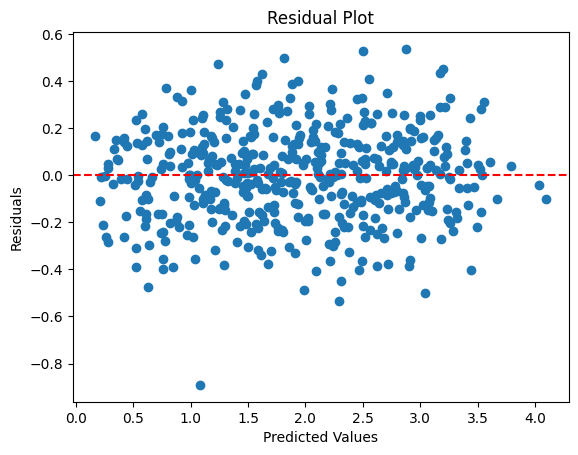

In [32]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

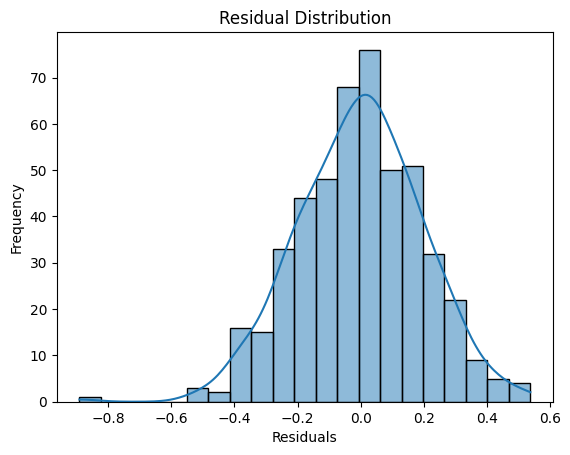

In [33]:
#Histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [34]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Age,-0.005734
Gender,0.010516
Ethnicity,0.004744
ParentalEducation,0.000125
StudyTimeWeekly,0.029039
Absences,-0.099517
Tutoring,0.258262
ParentalSupport,0.147838
Extracurricular,0.189546
Sports,0.184991


#Coefficient Insights
* Age (-0.005734):

For each additional year of age, the GPA decreases by approximately 0.0057 points, holding all other variables constant. This suggests that, with our dataset, older students tend to have slightly lower GPAs.

* Gender (0.010516):

This coefficient indicates that if the student is of a certain gender (if coded as binary), being that gender is associated with an increase in GPA by approximately 0.0105 points compared to the other gender, assuming other factors remain constant.

* Ethnicity (0.004744):

Similar to gender, this suggests that the student’s ethnicity is associated with a GPA increase of about 0.0047 points. This may depend on how ethnicity is encoded in your dataset (e.g., one-hot encoding).

* Parental Education (0.000125):

This coefficient shows that for each additional level of parental education (if coded as a numerical scale), the GPA increases by about 0.000125 points. This indicates a very small positive effect.

* StudyTimeWeekly (0.029039):

Each additional hour spent studying per week is associated with an increase in GPA by approximately 0.029 points. This emphasizes the positive impact of study time on academic performance.

* Absences (-0.099517):

Each absence is associated with a decrease in GPA of about 0.0995 points. This suggests that more absences negatively impact academic performance significantly.

* Tutoring (0.258262):

Each hour of tutoring is associated with an increase in GPA of approximately 0.258 points. This highlights the importance of tutoring in improving students' academic performance.

* Parental Support (0.147838):

Increased parental support is associated with a GPA increase of about 0.148 points, indicating that students who receive more support from their parents tend to perform better academically.

* Extracurricular Activities (0.189546):

Participation in extracurricular activities is associated with a GPA increase of approximately 0.190 points, suggesting that engaging in such activities may positively influence academic performance.

* Sports (0.184991):

Involvement in sports is associated with an increase in GPA of about 0.185 points, indicating that being active in sports can contribute to better academic performance.

* Music (0.152484):

Participation in music-related activities is associated with an increase in GPA of around 0.152 points, highlighting the positive effects of engagement in music on academic success.

* Volunteering (-0.005282):

This coefficient indicates that volunteering is associated with a very slight decrease in GPA (about 0.0053 points), suggesting that it may not have a significant impact on academic performance in this dataset.


**In Summary**

Positive Coefficients: Features like tutoring, parental support, and extracurricular activities show a positive impact on GPA. This suggests that more engagement in these areas can lead to better academic performance.

Negative Coefficients: Features such as absences have a negative effect on GPA, indicating that missing school negatively impacts performance.

Magnitude of Coefficients: The coefficients indicate the strength of the relationship. For example, tutoring has a substantial positive impact compared to the relatively minor effects of parental education or volunteering.

Consider using these insights to inform interventions or programs aimed at improving student performance, such as increasing tutoring opportunities or promoting parental engagement.
Investigate further into the features with significant impacts (e.g., tutoring, absences) to understand underlying causes and develop strategies for improvement.

Predictions shape: (479,)
Residuals shape: (479,)


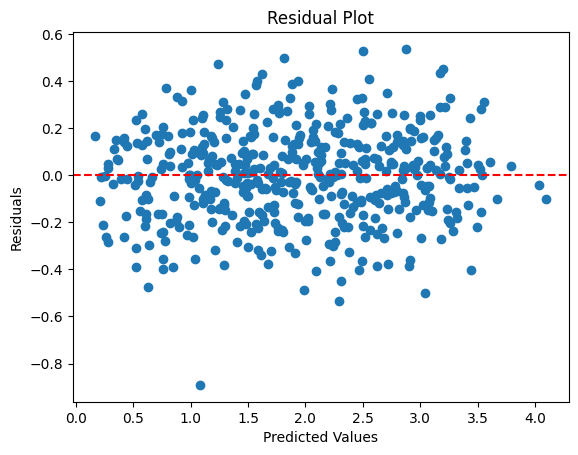

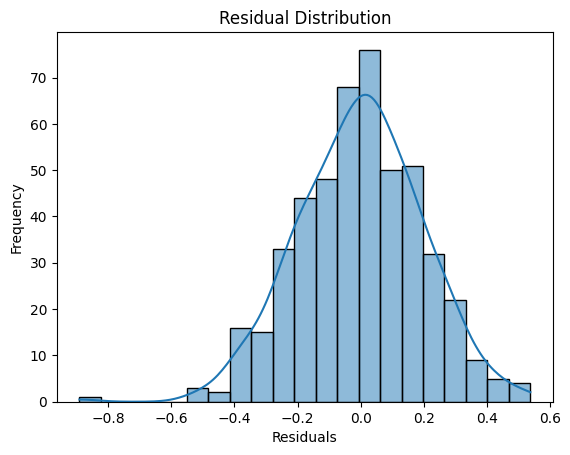

In [37]:
# Predictions and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Check sizes
print("Predictions shape:", y_pred.shape)
print("Residuals shape:", residuals.shape)

# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

This shows that our linear regrssion model is well-fitted since the residuals are randomly distributed around zero (the red horizontal line at y=0).

In [38]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()}")

Cross-validated MSE: 0.03889968649037626


#Neural Network

In [39]:
!pip install keras_visualizer
# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

from keras_visualizer import visualizer
from IPython.display import Image

from keras.optimizers import *
from keras.metrics import *

In [40]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()


In [41]:
#getting the input shape
input_shape = X_train.shape[1]
input_shape

12

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


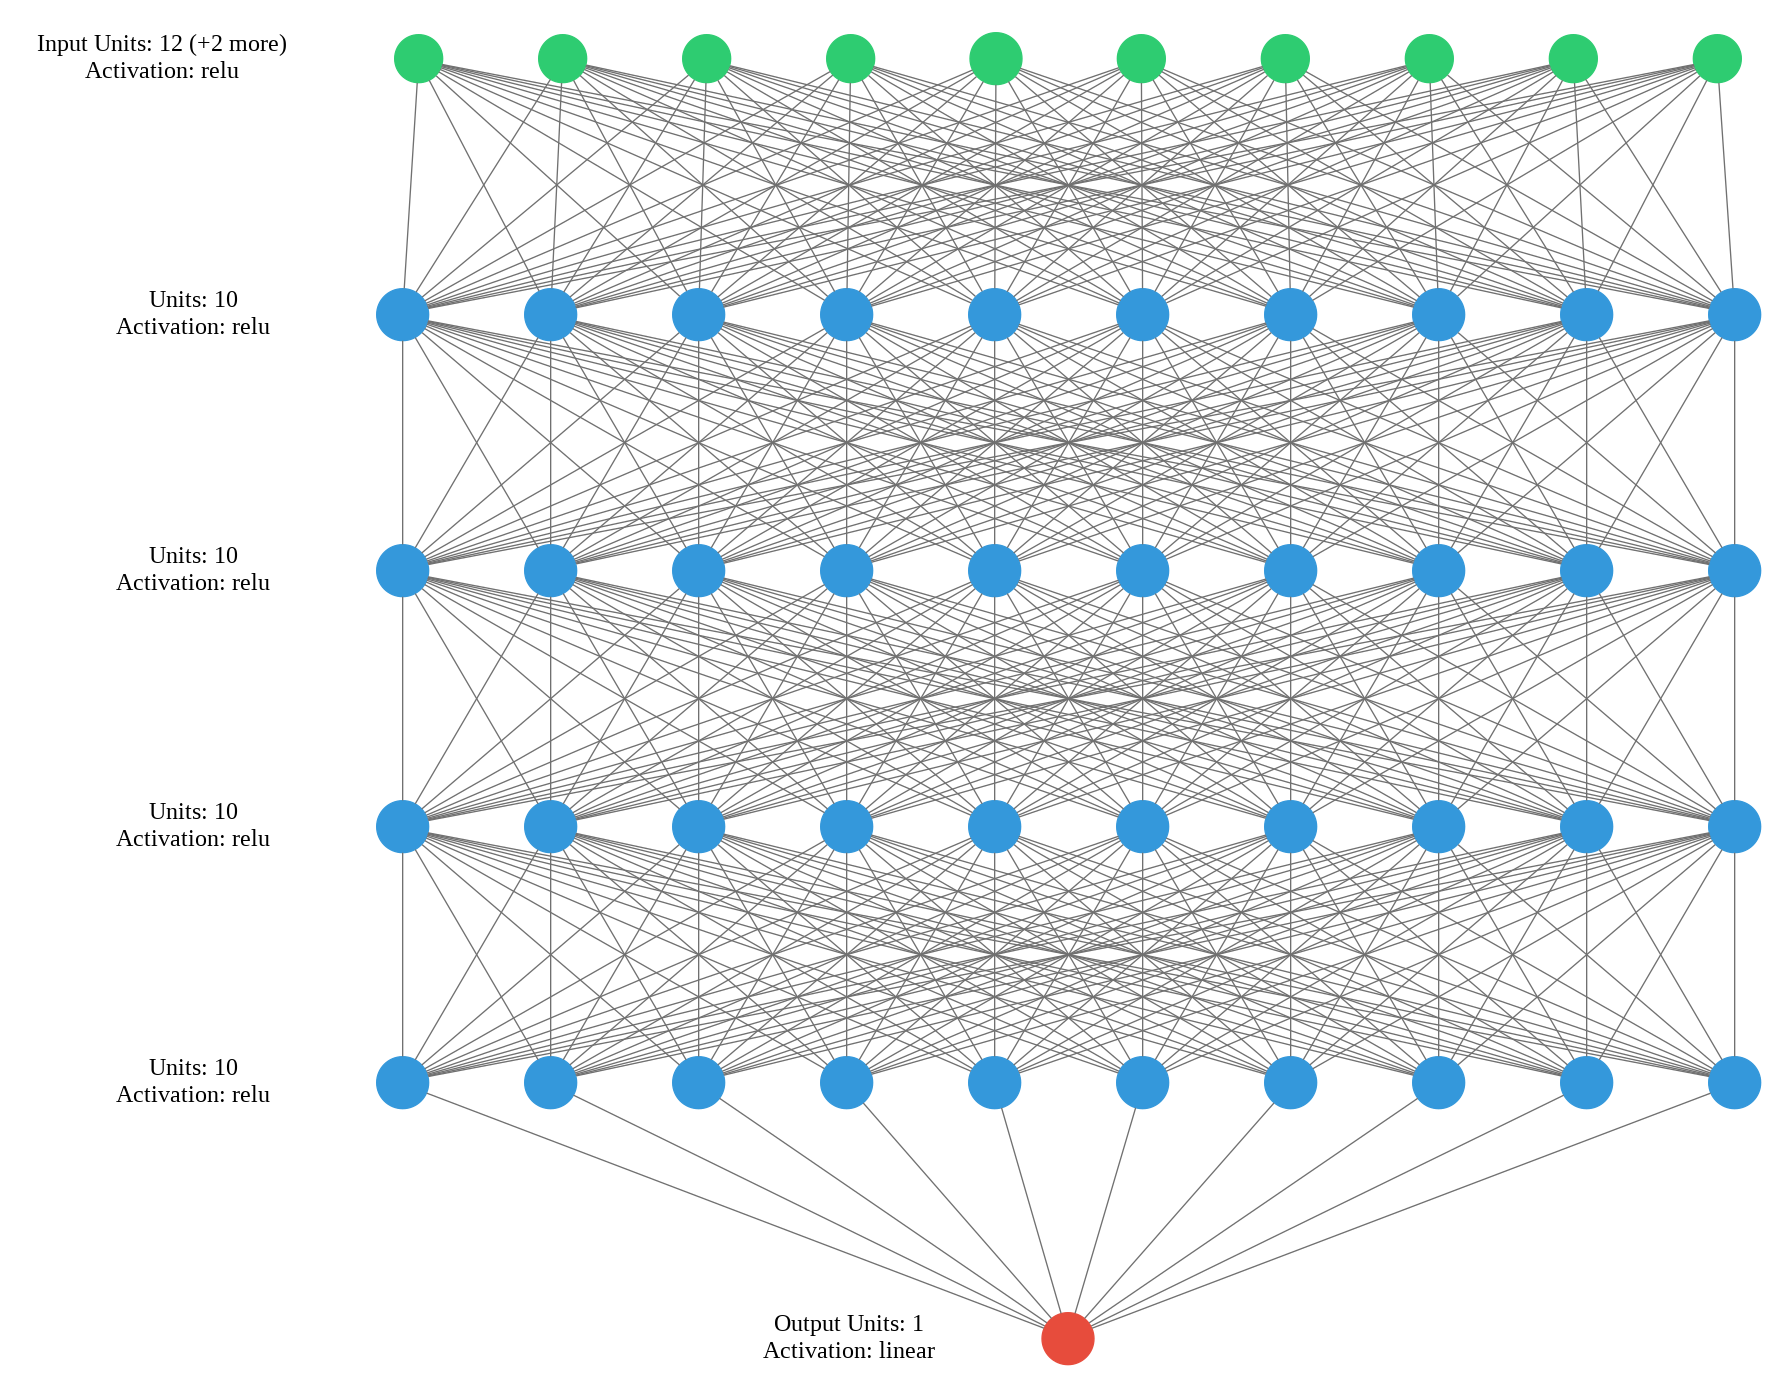

In [42]:
# Instantiate Sequential model object
nn_model = Sequential()

# Define the neural network
nn_model.add(Dense(10, input_dim=input_shape, activation='relu'))
nn_model.add(Dense(10, activation='relu'))
nn_model.add(Dense(10, activation='relu'))
nn_model.add(Dense(10, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

visualizer(nn_model, file_name='visual', file_format='png')
Image('visual.png')

In [43]:
opt = Adam(learning_rate=0.008)
nn_model.compile(optimizer=opt, loss='mse', metrics=['mae', 'RootMeanSquaredError','r2_score'])
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - RootMeanSquaredError: 1.6038 - loss: 2.7691 - mae: 1.2750 - r2_score: -2.4007
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - RootMeanSquaredError: 0.3687 - loss: 0.1364 - mae: 0.2984 - r2_score: 0.8341
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - RootMeanSquaredError: 0.2761 - loss: 0.0764 - mae: 0.2207 - r2_score: 0.9077
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.2554 - loss: 0.0653 - mae: 0.2046 - r2_score: 0.9229
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.2373 - loss: 0.0564 - mae: 0.1904 - r2_score: 0.9315
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - RootMeanSquaredError: 0.2445 - loss: 0.0598 - mae: 0.1983 - r2_score: 0.9305
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - RootMeanSquaredError: 0.2440 - loss: 0.0596 - mae: 0.1979 - r2_score: 0.9280
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - RootMeanSquaredError: 0.2337 - loss

In [44]:
eval = nn_model.evaluate(X_test, y_test, verbose=False)
print("MSE: " + str(eval[0]) + ", MAE: " + str(eval[1]) + ", RMSE: " + str(eval[2]))

MSE: 0.04842866212129593, MAE: 0.17567725479602814, RMSE: 0.2200651317834854


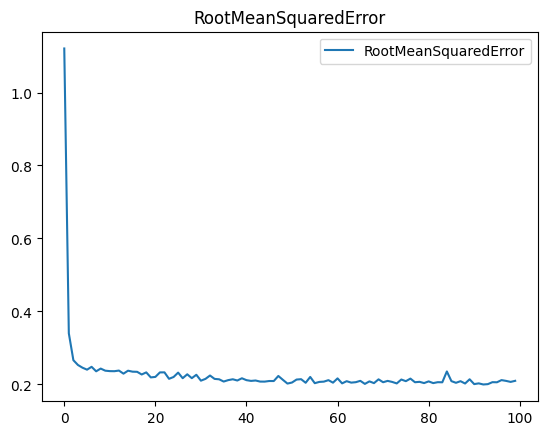

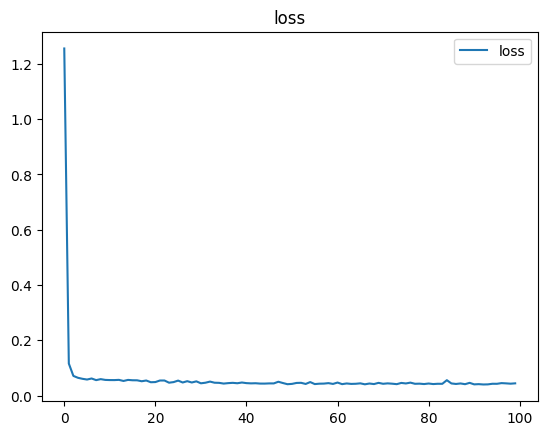

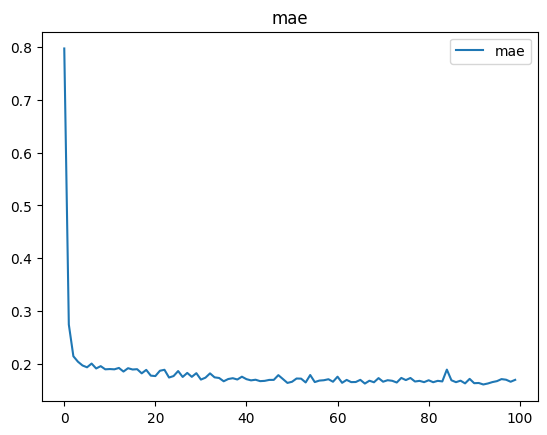

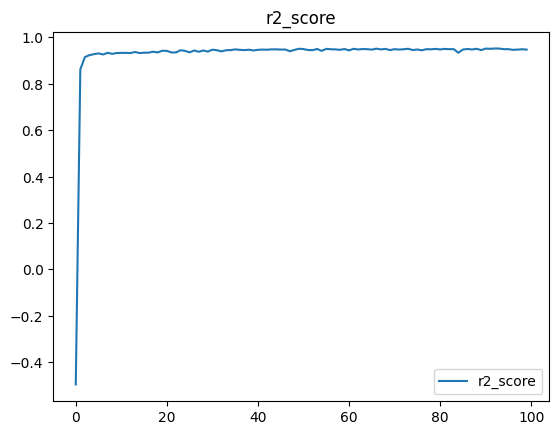

In [45]:
# Plots to show how the model learned
# plot learning

plot_history(history)